# Face Encodings

Process of taking an image of a face and turning it into a set of measurements

So far, our face recognition pipeline can find faces in an image, extract them, identify face landmarks, and then align the faces. Now we're ready to dive into the most important step in our face recognition pipeline: telling faces apart from each other (Representing a Face as a Set of Measurements)

### Telling faces apart from each other

We want to figure out which known face is the best match for our unknown face. The simplest approach would be to compare the unknown face with each of our known face images.

Whichever image has the most pixels in common must be the best match. However, this simplistic approach has two big problems. First, if we have lots of known faces directly comparing every pair of images would be too slow. Second, just comparing the images themselves isn't really the same as comparing the structure of each person's face.

#### Solution
The solution is to come up with a way to measure each face. 

For example, we might want to measure the width of each eye, the size of the cheekbones, and the width of the mouth, and so on. Then, if we want to compare two faces to see if they match, all we need to do is see if they have similar measurements. If the measurements of two faces are close enough, we can assume they are the same person. 

This is a better approach than comparing images directly because it takes the structure of the face into account. Also, it is much quicker to compare a few measurements than it is to compare an entire image with thousands of pixels.

In [1]:
from PIL import Image, ImageDraw
import PIL
import os
import face_recognition # access to the face detection model in DLIB

### Measurements in blue

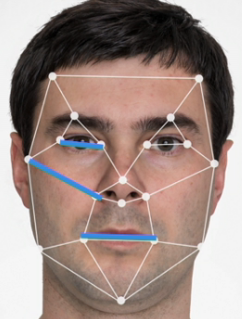

In [2]:
Image.open('Images/measure_one.png')

### Use the comparison image below

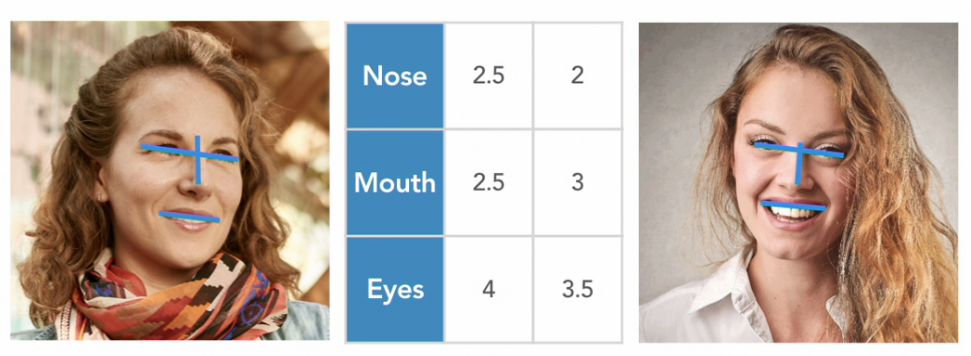

In [3]:
Image.open('Images/measure_compare.png')

Here are two faces, let's take three measurements for each face. 
1. First, the length of the nose. We'll say 2.5 on the left and 2 on the right. 
2. Next, the width of the mouth. Let's say 2.5 on the left and 3 on the right. 
3. And finally the distance from one eye to the other. 

Let's call that 4 on the left and 3.5 on the right. We can pretend that the three measurements we captured from each face are coordinates that identify a point in space. The three measurements from the first face were 2.5, 2.5, and 4 shown here as a point in blue. And the measurements from the second face mean that the face appears at point 2, 3, 3.5 shown here in orange.

The process of taking a picture of a face and turning it into a set of measurements is called face encoding. We're taking a complex image and reducing it down to a point in space.

-------------------------------

## Building the real face recognition system

- The real face recognition system we build will be based on this basic idea of encoding a face as a point in space (typically 128 or more)
- Instead of trying to decide on 128 ways to measure a face, we'll use machine learning to create those measurements

## Deep Metric Learning
Using deep learning to have a computer come up with a way to measure something that you don't know how to measure yourself

## Why use machine learning?
It turns out that computers can do a better job of deciding what to measure than we can. Instead of trying to come up with a set of measurements to represent each face, we'll use a deep convolutional neural network to come up with its own set of facial measurements instead. We'll use an approach called deep metric learning. 

## DML Process
1. You show it lots of examples of things that are the same and things that are different, and it figures out how to create measurements that tell them apart

Here are three pictures labeled A, B, and C. 

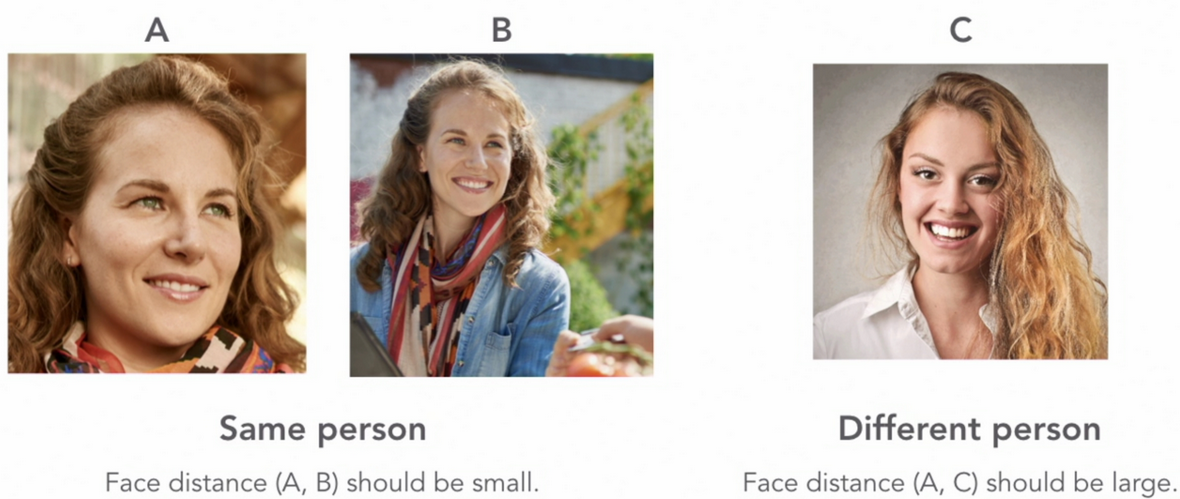

In [4]:
Image.open('Images/triplets.png')

Pictures A and B on the left show the same person. Picture C on the right is a different person than the first two. 

We want the face distance between the first two pictures to be very small because it's the same person. We also want picture C to have a large face distance from picture A because it's a different person. We can use this idea to set up a machine learning algorithm. We'll feed millions of photos into a neural network in groups of three like this. 

### Triplets
These groups of three are called __triplets__. Each triplet will have two pictures of the same person and one picture of a different person. The machine learning algorithm's job is to figure out how to represent each picture as a set of 128 measurements, where the third person's measurements are far apart from the others, while keeping the first two pictures' measurements close together. Each time the algorithm sees a triplet, it tweaks the face measurements it is generating a little bit to get closer to that goal. By repeating this process millions and millions of times with millions of pictures, the machine learning algorithm eventually learns how to generate a set of face measurements where two pictures of the same person have almost the same measurements, and two pictures of different people have very different measurements. 

-------------------------------

## Face Encoding Model

The model we trained is called a face encoding model because it is capable of encoding a picture as a set of measurements. 

After the face encoding model is trained, we can feed in a picture of any person, and the model should be able to generate a set of 128 numbers that represent that face. If we feed in another picture of the same person we should get back approximately the same numbers. Because a trained model should work for any picture of any person, that means that we only have to train the face encoding model once. 

As long as we train it on a wide variety of photographs representing millions of people, the model should work well for any person. This is great news, because training a new face encoding model requires millions of photographs and takes a long time, even using a computer with a high end GPU. 

## Pre-Trained Model

We'll be using a pre-trained model instead of training one from scratch. In most cases, this will work fine and you won't ever need to retrain your own face encoding model. 

## Problem of Interpretability - What do the face measurements mean?
So this brings up a great question. What do the 128 measurements generated by the face encoding model actually mean? Did it decide to measure the length of the person's nose or the size of the person's eyes? It turns out that we have no idea. All that we care is that the model generates nearly the same numbers when looking at two pictures of the same person. But the fact that we can't understand how the model is measuring each face is called the problem of interpretability. We can't interpret exactly how the model came up with its answers because the process it came up with will be too mathematically complex for us to understand. 

## Hidden Bias
The problem of interpretability exists with many different kinds of machine learning models, and because we don't understand exactly how the model is working, the model can have hidden biases that aren't easy to see. In the face recognition model, there's often a hidden bias where the model will be more accurate for people from one region of the world than another. This is because the training data used to train the model is unintentionally weighted towards photos of people from one region of the world. Make sure you keep this in mind when you are building face recognition systems. They don't perform equally well for all people, and they have their own hidden biases. 

## Unfair Representation
Just because they're using a computer algorithm doesn't mean that they are fair. Instead, they are just a reflection of the data that they were trained on, and data sets are almost never fair representations of the real world. 

---------------------------

## Write the code to generate face encoding for an image

In [6]:
# Load the jpg files into numpy arrays
image = face_recognition.load_image_file("Images/person.jpg")

# Generate the face encodings
face_encodings = face_recognition.face_encodings(image) # pass in an image array

''' 
The result of the function is an array. Each element in the array represents one face that was found in the image. 
The entry for each face contains another array with a 128 elements. 
Those 128 values are the face encoding that represent this unique face.
'''

# PIL Image (converts array to picture)
pil_image = PIL.Image.fromarray(image)

if len(face_encodings) == 0:
    # No faces found in the image.
    print("No faces were found.")

else:
    # Grab the first face encoding
    first_face_encoding = face_encodings[0] # get first element from the array

    # Print the results
    print(first_face_encoding)
    
    # Open
    pil_image.show()

[-0.20855851  0.01845224  0.05200066 -0.01912927 -0.02748835 -0.01855115
 -0.02725497 -0.0184503   0.19835585 -0.0112457   0.19645664  0.0160067
 -0.15621796 -0.08862408 -0.00915148  0.11604425 -0.12597211 -0.14229296
 -0.03572806 -0.03505833  0.03726118  0.03980888 -0.07782647  0.07926027
 -0.14744228 -0.3470616  -0.10856146 -0.12216781  0.01723715 -0.11650665
  0.06511284 -0.03900211 -0.18297049 -0.10930697  0.06847559  0.12637652
 -0.05037969 -0.09572248  0.13429841 -0.00703449 -0.16005872 -0.05573067
  0.08435321  0.27441847  0.13435344  0.08523722  0.00496128 -0.11246416
  0.16313235 -0.27373844  0.08402453  0.10128954  0.15344827  0.10832103
  0.11609219 -0.09201843  0.07474768  0.25488392 -0.30816695  0.10207553
  0.00198595 -0.01495537  0.03411685 -0.02620055  0.21705674  0.14441346
 -0.11093327 -0.12751678  0.17208101 -0.16183111 -0.04968163  0.12839435
 -0.03207506 -0.26411176 -0.31615111  0.07128874  0.36263996  0.18028149
 -0.13117105 -0.01013261 -0.05811106 -0.00737814  0.

There are 128 values that try to uniquely represent this face. Another picture of this same person should give us values that are very close to but not exactly the same as these values. A picture of a different person should give us values that are not close at all.

--------------------------------

### What if there are no faces?
With the size of zero, that means no faces were detected in the image. This can happen for several reasons. First, if there are no faces in the image at all then no results will be returned. Second, sometimes it can't find any faces in the image even when there are faces there. The two most common reasons are due to the faces too small to detect or there's something wrong with the image data itself. 

### How to use measurements to represent a face?
Using our face encoding model we can feed in the picture of a face and get back 128 measurements to represent that face. So how can we use those measurements to identify people? We'll do that using Euclidean distance. Euclidean distance is just the distance between two points in space along a straight line. It can be hard to visualize a model with 128 measurements. 

## Euclidean Distance
The distance between two points in space along a straight line

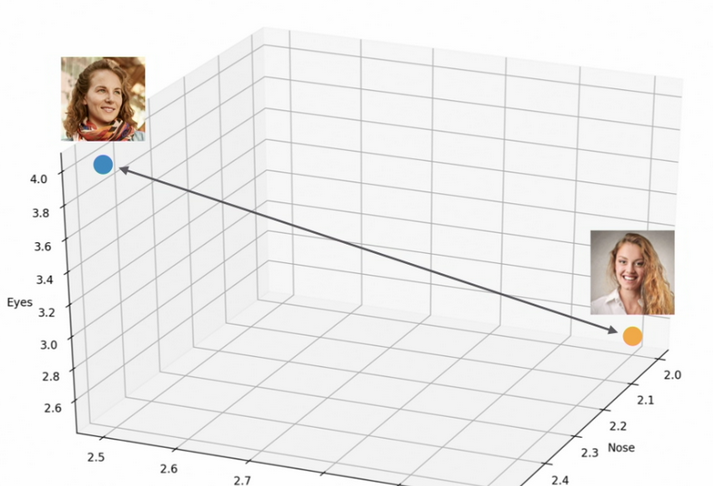

In [8]:
Image.open('Images/euclidean_distance.png')

### 3D Space
Now we can visualize those sets of measurements as two points in 3D space. The face on the left is at 2.5, 2.5, 4, shown here as a point in blue, and the face on the right is at 2, 3, 3.5, shown here in orange. 

### Measuring the Line
To measure the distance between them, we'll draw a straight line between those points and measure the length of that line. This line is the Euclidean distance between those two faces. To check if two faces match or not, we'll check the distance we calculated against a threshold or cutoff value. 

### Setting a Face Distance Threshold
Let's set the threshold at 0.6 (face maximum distance that is still considered the same face), and this threshold value is set when you train the face-encoding model. The model we'll be using in our code was trained with a 0.6 threshold, so we'll use that same number in these examples. 

We'll say that if the distance between faces is over 0.6, the faces are too far apart to be the same person. That if they're under the threshold, we'll say that they match and the lower the distance, the better the match. Here' the formula for calculating Euclidean distance between two points. 
1. First, we'll substitute in our two points. __(See picture below)__ We'll substitute 2.5, 2.5, and four as the values for A, and two, three, 3.5 as the values for B. 
2. Now we'll just do the calculations. And we'll see that the result is the square root of 0.75. If we do that calculation, that works out to about 0.866. That's the distance between the two faces. And since 0.866 is over our 0.6 threshold, we'll say that those two faces are not a match. 

In our real face recognition system, we'll be capturing 128 measurements for each face instead of only three. Because of that, the Euclidean distance formula is longer than it was for three points, but the only difference is that we need to add extra terms for each dimension. So the final formula will have 128 squared terms under the square root instead of just three.

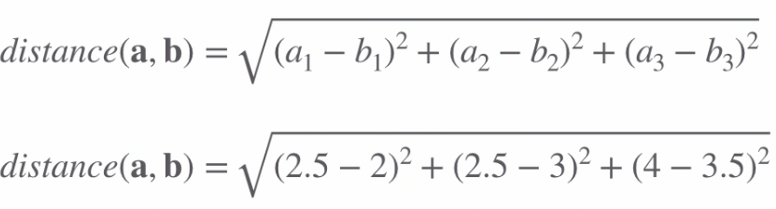

In [9]:
Image.open('Images/eu_dist_formula.png')

### Result
distance(a, b) = sqrt(0.75) ~ 0.866 (distance between the two faces)

Not a match since 0.866 > 0.60

### Benefits of Euclidean Distance for Face Matches
Using Euclidean distance to check for face matches has a lot of nice properties. 

1. Fast to calculate and easy to parallelize
    - First, calculating Euclidean distance is fast, so it's easy to compare an unknown face against a large set of known faces quickly. If you're familiar with __vector calculus__, you might notice that calculating Euclidean distance is basically the same math as calculating a vector's norm. This is an operation that can be parallelized easily by modern CPUs so the calculation runs very quickly. 


2. Works nicely with other common ML algorithms (KNN)
    - Second, lots of other machine learning algorithms already work well with data that represents points in space separated by a distance. For example, the k-neaest neighbors, or KNN, algorithm, is a common machine learning algorithm that is used to identify clusters of similar points. Because each face is just a point in space, we can easily apply algorithms like this to face data.


3. Makes it easy to store and query face measurements in a database
    - Third, it's easy to store a list of points in the database. That means that, if we wanna work with large sets of faces, we can store our face-encodings in a database and quickly search them, and even calculate face distances, using the database's math operations. The database doesn't even have to know anything about deep learning. 